<a href="https://colab.research.google.com/github/DanielP53/Labs-SP1/blob/master/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#indicamos que se usara la version 2 de Tensorflow y se importa
%tensorflow_version 2.x
import tensorflow as tf
#importamos el set de datos desde la libreria de Keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#librerias de ayuda para el manejo de numeros e imagenes
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#utilizado para el darkmode
plt.rc_context({'xtick.color':'w','ytick.color':'w','text.color':'w','axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

train_images shape: (60000, 28, 28)


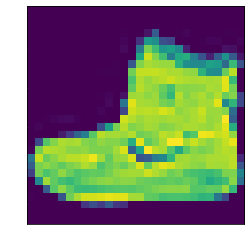

In [15]:
#cargamos el set de datos
(train_images,train_labels),(test_images,testlabels)=fashion_mnist.load_data()
print('train_images shape:',train_images.shape)
#Creamos las clases
class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.imshow(train_images[0])
plt.show()


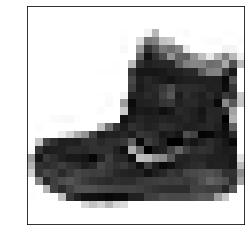

In [18]:
train_images= train_images/255.0
test_images= test_images/255.0
#por que hay que normalizar y estandarizar?
#en la documentacion de tensor no lo convierten a escala de grises... solo lo imprimen como escala de grises.. por que?
#por que se dividia en 255
plt.imshow(train_images[0],cmap=plt.cm.binary)